<a href="https://colab.research.google.com/github/Dltmd202/DeepLearningStudy/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝

## 선형회귀




### 모델

In [ ]:
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  def forpass(self ,x):
    y_hat = x * self.w + self.b
    return y_hat

  def backprop(self , x , err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad , b_grad
  
  def fit(self , x , y , epochs = 100):
    for i in range(epochs):
      for x_i , y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad , b_grad= self.backprop(x_i , err)
        self.w -= w_grad
        self.b -= b_grad

### 학습 데이터

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = diabetes.data[:,2]
y = diabetes.target

neuron = Neuron()
neuron.fit( x , y )


### 결과

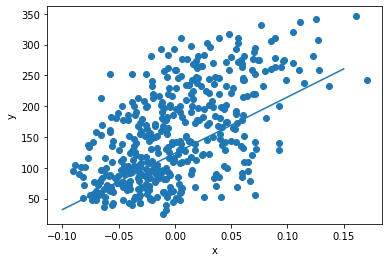

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
pt1 = (-0.1 , -0.1 * neuron.w + neuron.b)
pt2 = (0.15 , 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 페셉트론


### 전체 데이터 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test , y_train , y_test = train_test_split(x,y, stratify = y , test_size=0.2 , random_state=42)



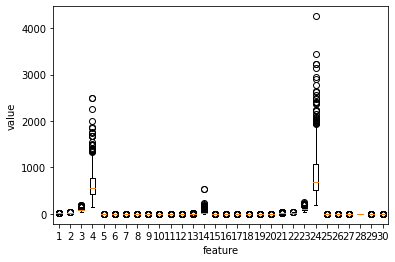

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
cancer.feature_names[[3,13,23]]
np.unique(cancer.target,return_counts=True)

(array([0, 1]), array([212, 357]))

### 로지스틱 회귀 모델

In [ ]:
class LogisticNeuron:
  def __init(self):
    self.w = None;
    self.b = None;
    self.losses = []

  def forpass(self ,x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self , x , err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad , b_grad
  
  def activation(self, z):
    a = 1 / (1 +np.exp(-z))
    return a
  
  def fit(self , x ,y , epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i , y_i in zip(x ,y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad , b_grad = self.backprop(x_i , err)
        self.w -= w_grad
        self.b -= b_grad
    for i in index:
    
  def predict(self ,x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5
  

IndentationError: ignored

### 학습 데이터 적용

In [ ]:
neuron = LogisticNeuron()
neuron.fit(x_train , y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


### 결과

In [ ]:
#Test result of LogisticNeuron
np.mean(neuron.predict(x_test)== y_test )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


0.8245614035087719

## 단일층 신경망

### 단일층 신경망 모델

In [ ]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self ,x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self , x , err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad , b_grad
  
  def activation(self, z):
    a = 1 / (1 +np.exp(-z))
    return a
  
  def fit(self , x ,y , epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.losses
    for i in range(epochs):
      loss = 0
      indexs = np.random.permutation(np.arange(len(x)))
      for i in indexs:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad , b_grad = self.backprop(x[i] , err)
        self.w -= w_grad
        self.b -= b_grad

        a = np.clip(a , 1e-10,1-1e-10)
        loss += -(y[i]*np.log(a) + (1-y[i]*np.log(1-a)))
      #손실함수값 저장
      self.losses.append(loss/len(y))

  def predict(self ,x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0
  
  def score(self , x ,y):
    return np.mean(self.predict(x) == y )


### 단일층 학습

In [ ]:
layer = SingleLayer()
layer.fit(x_train , y_train)
layer.score(x_test , y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.9385964912280702

### 단일층 모델 적용 과정에서의 손실함수 결과 값

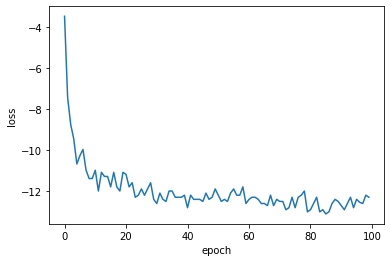

In [ ]:
layer.score(x_test , y_test)
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log',max_iter=100 , tol=1e-3 , random_state=42)
sgd.fit(x_train , y_train)
sgd.score(x_test , y_test)

0.8333333333333334

In [ ]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

## 훈련

### 훈련 세트와 테스트 세트

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target
x_train_all , x_test , y_train_all , y_test = train_test_split(x ,y , stratify=y,test_size=0.2 , random_state =42)

In [6]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log',random_state = 42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test , y_test)

0.8333333333333334

In [7]:
#튜닝
sgd = SGDClassifier(loss='hinge',random_state = 42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test , y_test)

0.9385964912280702

### 검증 세트 적용

### 데이터 분활

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all , x_test , y_train_all , y_test = train_test_split(x ,y , stratify =y , test_size =0.2 , random_state =42)

In [9]:
x_train , x_val , y_train , y_val = train_test_split(x_train_all , y_train_all ,
                                                     stratify =y_train_all , test_size =0.2 , random_state =42)
print(len(x_train),len(x_val))

364 91


### log 손실함수를 적용한 일반화 성능

In [10]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log',random_state = 42)
sgd.fit(x_train,y_train)
sgd.score(x_test , y_test)

0.6929824561403509

### 스케일이 조정되지 않은 데이터

['mean perimeter' 'mean area']


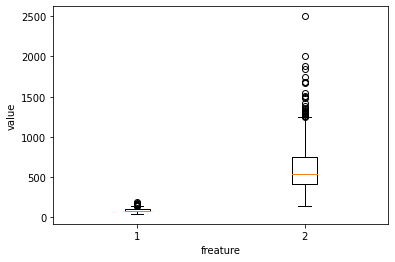

In [11]:
import matplotlib.pyplot as plt
import numpy as np

print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('freature')
plt.ylabel('value')
plt.show()

* 두 데이터 집단의 스케일 차이가 크므로 스케일 조정이 필요함을 알 수 있다

### 업데이트의 양을 조절하고 가중치를 기록하는 단일층

In [12]:
class SingleLayer:
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses = []
    # to record change of w
    self.w_history = []
    self.lr = learning_rate

  def forpass(self ,x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self , x , err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad , b_grad
  
  def activation(self, z):
    a = 1 / (1 +np.exp(-z))
    return a
  
  def fit(self , x ,y , epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.losses
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexs = np.random.permutation(np.arange(len(x)))
      for i in indexs:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad , b_grad = self.backprop(x[i] , err)
        self.w -= w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())

        a = np.clip(a , 1e-10,1-1e-10)
        loss += -(y[i]*np.log(a) + (1-y[i]*np.log(1-a)))
      #손실함수값 저장
      self.losses.append(loss/len(y))

  def predict(self ,x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0
  
  def score(self , x ,y):
    return np.mean(self.predict(x) == y )


In [13]:
layer = SingleLayer()
layer.fit(x_train , y_train)
layer.score(x_val , y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


0.9120879120879121

Text(0, 0.5, 'w[3]')

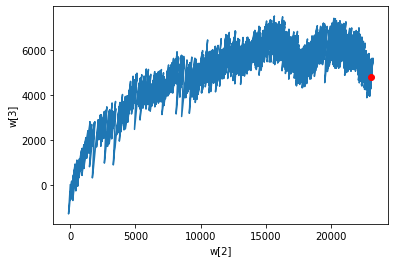

In [14]:
w2 = []
w3 = []
for w in layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2 ,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

* w[2]에 비해 w[3]이 큰 폭으로 변화하고 있다

### 표준화

In [15]:
train_mean = np.mean(x_train , axis= 0)
train_std = np.std(x_train , axis = 0)
x_train_scaled = (x_train - train_mean) / train_std

Text(0, 0.5, 'w[3]')

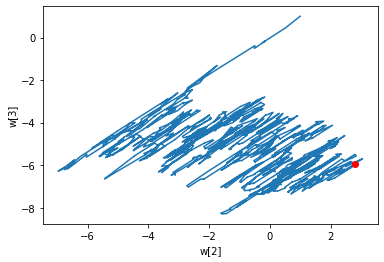

In [16]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled , y_train )
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

* 변화의 비율이 비슷하기 때문에 가중치는 대각선 방향으로 움직임을 보인다.

### 모델 성능 평가 - 검증 세트

In [18]:
val_mean = np.mean(x_val , axis = 0)
val_std = np.std(x_val , axis = 0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled,y_val)


0.9560439560439561